In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import re

import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import random
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,CategoricalNB
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
import string
from sklearn import preprocessing
from sklearn.manifold import TSNE
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import svm
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from time import time
from sklearn.model_selection import StratifiedKFold

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\askma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\askma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [131]:
df = pd.read_csv("C:/Users/askma/OneDrive/Desktop/tweets_final_project_data.csv")

In [132]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Cleaning

In [133]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<AxesSubplot:>

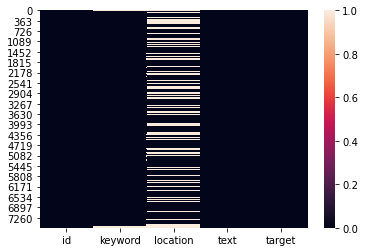

In [134]:
sns.heatmap(df.isna())

<AxesSubplot:xlabel='target', ylabel='count'>

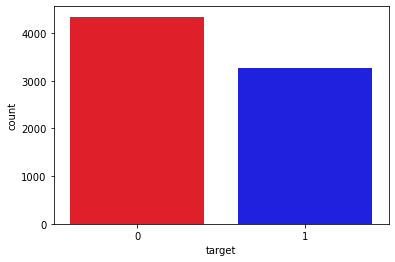

In [135]:
sns.countplot(x = 'target', data = df, palette=['#FF000F','#0000FF','#00FF00'])

In [136]:
df.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [137]:
print(df.shape)

(7613, 5)


In [138]:
df.drop_duplicates(subset=['text', 'target'], keep='first')

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1


<AxesSubplot:xlabel='location'>

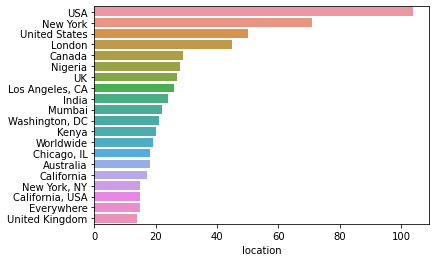

In [139]:
sns.barplot(y=df['location'].value_counts()[:20].index,x=df['location'].value_counts()[:20])

In [140]:
df['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                            "Washington, DC":'USA',
                            "Sacramento, CA":'USA',
                            "Nashville, TN":'USA',
                            "US":'USA',
                            "Denver, Colorado":'USA',
                            "Dallas, TX": "USA",
                            "San Diego, CA": "USA",                       
                            "Chicago, IL":'USA',
                            "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Texas, USA":'USA',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

<AxesSubplot:xlabel='location'>

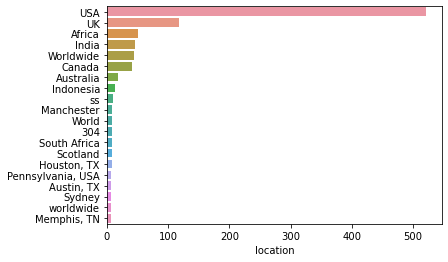

In [141]:
sns.barplot(y=df['location'].value_counts()[:20].index,x=df['location'].value_counts()[:20])

# EDA

In [142]:
df['text_length'] = df.text.apply(lambda x: len(x.split()))

In [143]:
df['text_length'].describe()

count    7613.000000
mean       14.903586
std         5.732604
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: text_length, dtype: float64

In [144]:
is_real = df.loc[df['target'] == 1]

<AxesSubplot:xlabel='keyword'>

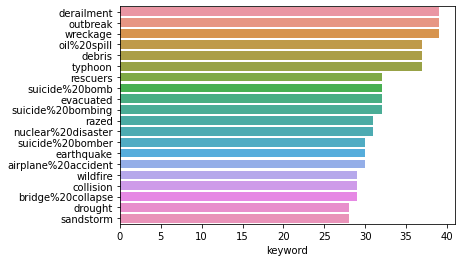

In [145]:
sns.barplot(y=is_real['keyword'].value_counts()[:20].index,x=is_real['keyword'].value_counts()[:20])

In [146]:
not_real = df.loc[df['target'] == 0]

<AxesSubplot:xlabel='keyword'>

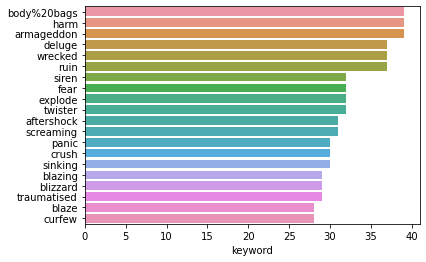

In [147]:
sns.barplot(y=not_real['keyword'].value_counts()[:20].index,x=is_real['keyword'].value_counts()[:20])

<AxesSubplot:xlabel='keyword'>

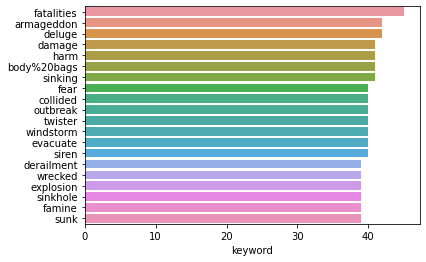

In [148]:
sns.barplot(y=df['keyword'].value_counts()[:20].index,x=df['keyword'].value_counts()[:20])

<AxesSubplot:xlabel='location'>

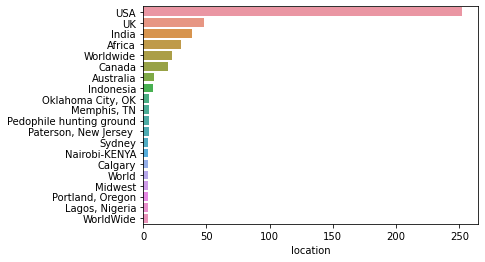

In [149]:
sns.barplot(y=is_real['location'].value_counts()[:20].index,x=is_real['location'].value_counts()[:20])

<AxesSubplot:xlabel='location'>

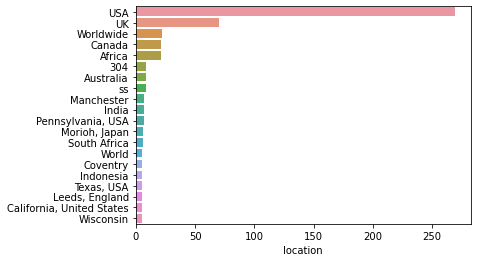

In [150]:
sns.barplot(y=not_real['location'].value_counts()[:20].index,x=not_real['location'].value_counts()[:20])

# Feature Engineering

In [151]:
df['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [152]:
def clean_text(text):
    text= text.lower()
    text= re.sub('[0-9]', '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    #tokens=[pstem.stem(word) for word in tokens]
    tokens=[word for word in tokens if word not in stopwords.words('english')]
    text = ' '.join(tokens)
    return text

In [153]:
df["new_text"]=df["text"].apply(clean_text)

In [154]:
df['new_text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                utckm volcano hawaii httptcozdtoydebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: new_text, Length: 7613, dtype: object

In [155]:
df.head()

,id,keyword,location,text,target,text_length,new_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,got sent photo ruby alaska smoke wildfires pou...
